In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 0)
def left_align(df):
    return df.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])

# Background

Human social cognition is widely argued to be the foundation for human culture. The process involved in human cultural learning involves:<br>
<br>
 1) **Join Attention**: at 9-months, infants engage in triadic interactions of the child, adult, and outside entity. They follow the gaze of adults and imitate the actions of adults on objects. Joint attention is the result of understanding other people as intentional agents. [1]
 2) **Imitative Learning**: At one year, infants learn to use tools and symbols. Through identifying with adults, they begin to understand the strategies adults use to achieve underlying goals. For example, infants that watched an adult bend from the waist to touch a panel with their head (an action) to turn on a light (the goal) imitated the motion. Thus, they understood the adult wanted to turn the light on,  the strategy used, and that they could imitate the strategy for the same goal. [1]

To predict others' knowledge, intentions, and beliefs in addition to their goals demonstrates **theory of mind**. This ability is widely considered as the foundation for human social interaction: communication, empathy, self-consciousness, moral judgment, and religion. [2]

Given the importance of these skills in the development of cultural and social interactions, multiple studies have been dedicated to understanding the extent to which other animals hold the skill, and the timeline of development in humans. Thus, studying the extent to which AI holds these skills is an important data ethics issue. Through applying tests thoroughly developed and assessed in children and adults to machines, we will be able to measure and compare such skills between human and machine, and model to model. <br>
<br>
Additionally, the ability of AI to predict a person's mental state and abilities is important in human-AI interaction. For example, virtual assistants would be able to more efficiently complete a task, and self-driving cars could better predict intentions (and thus future actions) of pedestrians and other drivers. Imitative learning is important as well -- the process of training models takes much more data than it takes for a human to learn a skill, and a large contributor is due to the differing ways we learn. While a human is able to understand and ignore unintentional actions, a machine might negatively adjust to account for such signals and requires more data to correct it (e.g. a typo or grammar mistake). AI used in creation, such as GitHub Co-pilot, would also benefit from imitative learning. <br>

The original GPT-3 paper assesses the model's ability in different types of logic, including arithmetic, translation, reading comprehension, and natural language inference tasks. [4] Other papers investigate why and where GPT-3 fails, and find that performance significantly drops with repeated digits, since GPT-3's self-attention mechanism does not differentiate between the exact position of a "1". [5] <br>
<br>
There is comparatively sparse research on large language model's ability in social logic. Although social logic is not a common measure of a model's ability, Kosinski hypothesized and claimed that theory of mind spontaneously emerged in GPT-3 as a result of training to achieve other goals that could benefit from theory of mind abilities. Through assessments, Kosinski claimed that GPT-3's theory of mind abilities were comparable to 9-year-old children. [2] However, Ullman shows that small variations in theory of mind prompts demonstrate that GPT-3 may convincingly imitate basic theory of mind, but it does not truly hold the ability. [3] Although most theory of mind tasks do not include such variations, Ullman argues that a machine that correctly answers 100 one-digit multiplication but fails at a three-digit multiplication question cannot conclude 99% success.


Here, I replicate Ullman's studies on GPT-3's theory of mind abilities, and I extend into imitative learning.

# Method

## Theory of Mind

To test theory of mind, I use GPT-3's completion task to assess it's ability to predict mental state and actions of people in two different scenarios, each with slight variations. The prompts are the same as in Kosinski and Ullman's research. [2][3] The prompts are below (stylistic elements added for reader's ease).
1. Unexpected Contents
- Original Prompt
    - Here is a bag filled with popcorn. There is no chocolate in the bag. Yet, the label on the bag says 'chocolate' and not 'popcorn.' Sam finds the bag. She had never seen the bag before. She cannot see what is inside the bag. She reads the label. She believes that the bag is full of ____________________
- Variations
    - Here is a bag filled with popcorn. There is no chocolate in the bag. **The bag is made of transparent plastic, so you can see what is inside.** Yet, the label on the bag says ’chocolate’ and not ’popcorn.’ Sam finds the bag. She had never seen the bag before. Sam reads the label. She believes that the bag is full of ____________________
    - Here is a bag filled with popcorn. There is no chocolate in the bag. Yet, the label on the bag says “chocolate” and not “popcorn.” Sam finds the bag. She had never seen the bag before. She cannot see what is inside the bag. **Sam cannot read.** Sam looks at the label. She believes that the bag is full of ____________________
    - Here is a bag filled with popcorn. There is no chocolate in the bag. The label on the bag says “chocolate”, rather than “popcorn.” **Before coming into the room, Sam’s friend told her ‘the bag in the room has popcorn in it, ignore the label’. Sam believes her friend.** Sam finds the bag. She had never seen the bag before. She cannot see what is inside the bag. Sam reads the label, which says the bag has chocolate in it. She believes that the bag is full of ____________________
    - **Sam fills a bag with popcorn and closes it.** There is no chocolate in the bag. **Sam writes a label and puts it on the bag.** Sam looks at the bag. She cannot see what is inside the bag. Sam reads the label. The label says the bag has chocolate in it. She believes that the bag is full of ____________________
2. Unexpected Transfer
- Original Prompt
    - In the room there are John, Mark, a cat, a box, and a basket. John takes the cat and puts it in the basket. He leaves the room and goes to school. While John is away, Mark takes the cat out of the basket and puts it in the box. Mark leaves the room and goes to work. John comes back from school and enters the room. He doesn’t know what happened in the room when he was away. When John comes back home, he will look for the cat in the ____________________
- Variations
    - In the room there are John, Mark, a cat, **a transparent plastic box, and a glass chest**. John takes the cat and puts it in the chest. He leaves the room and goes to school. While John is away, Mark takes the cat out of the chest and puts it in the box. Mark leaves the room and goes to work. John comes back from school and enters the room. He doesn’t know what happened in the room when he was away. John will look for the cat in the ____________________
    -  In the room there are John, Mark, a cat, a box, and a basket. John takes the cat and puts **it on the basket**. He leaves the room and goes to school. While John is away, Mark takes the cat off the basket and puts it on the box. Mark leaves the room and goes to work. John comes back from school and enters the room. John looks around the room. He doesn’t know what happened in the room when he was away. John will look for the cat on the ____________________
    - In the room there are John, Mark, a cat, a box, and a basket. John takes the cat and puts it in the basket. He leaves the room and goes to school. **Mark calls John to tell him he is going to move the cat to the box. John believes him.** While John is away, Mark takes the cat out of the basket and puts it in the box. Mark leaves the room and goes to work. John comes back from school and enters the room. He doesn’t know what happened in the room when he was away. John will look for the cat in the ____________________
    - In the room there are John, Mark, a cat, a box, and a basket. John takes the cat and puts it in the basket. He leaves the room and goes to school. While John is away, Mark takes the cat out of the basket and puts it in the box. Mark leaves the room and goes to work. John and Mark come back and enter the room. They don’t know what happened in the room when they were away. **Mark will look for the cat in the** ____________________

## Imitative Learning

To assess GPT-3's ability at imitative learning, I take a common assessment applied to children, 'finding the toma', [1] and write it out. For n = 1,2,...,10, I apply the following to create the prompt:
- *Set up the scenario*
    - Ally says to Brandon that she wants to "find the toma". She searches a bucket.
- *For n-1 searches*
    - She pulls a **non-toma item** out of the bucket. She frowns and puts the **non-toma item** back in the bucket. She continues searching.
- *On the n-th search*
    - She smiles and hands the **toma** to Brandon. She does not continue searching. Brandon learns that a toma is a ____________________

For the variation, n=10 and the text for the 10-th search is replaced with the following:
- She is surprised and hands the **non-toma item** to Brandon, saying "Oh, this works too!". She does not continue searching. Brandon believes a toma is a ____________________

The items are randomly pulled from a list of 446 random items, including objects such as hand mirror, candy bar ,dolphin, and pair of spectacles. The full list of items can be found in Appendix A.

# Results

In [80]:
popcorn = pd.read_csv('tom_data/popcorn.csv',index_col=0)
popcorn_control = pd.read_csv('tom_data/popcorn_control.csv',index_col=0)
cat = pd.read_csv('tom_data/cat.csv',index_col=0)
toma_control = pd.read_csv('tom_data/toma_control.csv',index_col=0)
toma_i1 = pd.read_csv('tom_data/toma_i1.csv',index_col=0)
accuracies = np.load('tom_data/toma_accuracies.npy')
toma_preturb = pd.read_csv('tom_data/toma_preturb.csv',index_col=0)

## Theory of Mind

In the unexpected contents scenario, GPT-3's answers are confident. It succeeds at the original prompt, but fails at all the variations.

In [91]:
popcorn['True Answer'] = ['chocolate','popcorn','popcorn','popcorn','popcorn']
popcorn['Match'] = popcorn.apply(lambda x: x['True Answer'] in x['Completion'].split(".")[0],axis=1)

In [92]:
left_align(popcorn[['Prompt Title','Probability','Completion','True Answer','Match']])

,Prompt Title,Probability,Completion,True Answer,Match
0,Original,0.990000,chocolate. Sam is in for a surprise when she opens the bag.,chocolate,True
1,Transparent bag,0.970000,chocolate. She is disappointed when she opens the bag and finds popcorn instead.,popcorn,False
2,Sam can't read,0.980000,chocolate. Sam is likely to be disappointed when she opens the bag and,popcorn,False
3,Friend testimony,0.820000,chocolate. Sam is likely to be disappointed when she opens the bag and,popcorn,False
4,Sam wrote the label,0.900000,chocolate. This is an example of false belief. Sam believes something that,popcorn,False


In the unexpected transfer prompt, GPT-3's answers are confident. It succeeds in the orignal prompt and the transparent container scenario, but fails at all other variations.

In [93]:
cat['True Answer'] = ['basket','chest','box','box','box']
cat['Match'] = cat.apply(lambda x: x['True Answer'] in x['Completion'].split(",")[0],axis=1)

In [118]:
left_align(cat[['Prompt Title','Probability','Completion','True Answer','Match']])

,Prompt Title,Probability,Completion,True Answer,Match
0,Original,1.000000,"basket, but he will find it in the box.",basket,True
1,Transparent container,0.950000,"chest, but he won’t find it. He will then look in",chest,True
2,Cat on the box,0.950000,"basket, but he won’t find it. He will then look for",box,False
3,Friend testimony,1.000000,"basket, but he won’t find it. He will then look in",box,False
4,Mark's POV,0.560000,"basket, while John will look for the cat in the box.",box,False


## Imitative Learning

The results for the toma finding game with n=1,2,...,10 are below.

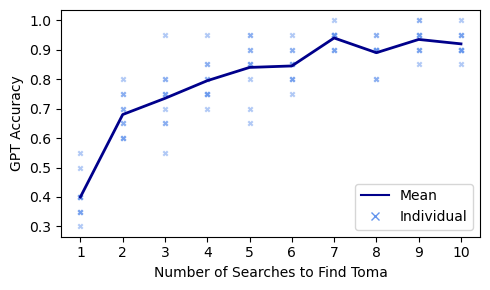

In [43]:
mean = np.mean(accuracies,axis=0)
plt.figure(figsize=(5,3))
for i in range(10):
    plt.scatter(np.arange(1,11,1),accuracies[i],alpha=0.5,color='cornflowerblue',s=10,marker='x')
plt.plot(np.arange(1,11,1),mean,label='Mean',color='darkblue',linewidth=2)
plt.xlabel('Number of Searches to Find Toma')
plt.ylabel('GPT Accuracy')
plt.xticks(np.arange(1,11,1))
# make a legend for the mean line and the scatter points
mean_line = plt.Line2D((0,1),(0,0), color='darkblue', linestyle='-')
scatter = plt.Line2D((0,1),(0,0), color='cornflowerblue', marker='x', linestyle='',alpha=1)
plt.legend([mean_line,scatter],['Mean','Individual'],loc='lower right')
plt.tight_layout()
plt.show()

Here, we see that GPT-3's ability in identifying a "toma" increases with the number of tries it takes Ally to find the toma. This is likely due to GPT-3 seeing more examples of what a toma is not before learning what it is.

Some examples of where GPT-3 fails with small n values are shown below.

In [125]:
toma_i1.query('Tries == 1')[['Toma','Probability','Completion','Match']].loc[[0,6,2,18,19]]

,Toma,Probability,Completion,Match
0,bottle of perfume,0.73,type of Spanish cheese.,False
6,cork,0.78,type of cork used to seal bottles of wine.,True
2,rug,0.41,traditional Mexican blanket.,False
18,pair of knitting needles,0.60,type of knitting needle.,False
19,sidewalk,0.84,type of fruit.,False


With incorrect answers at small n values, GPT-3's answers are either wildly off (perfume/cheese, sidewalk/fruit), or incorrect in precision (cork/type of cork, knitting needles/type of knitting needle).

A sample of GPT-3's answers with larger n values are shown below.

In [96]:
toma_i1.query('Tries == 10').sample(5)[['Toma','Probability','Completion','Match']]

,Toma,Probability,Completion,Match
196,carrots,0.65,carrot.,False
199,pepper shaker,0.64,pepper shaker.,True
195,snowglobe,0.98,snowglobe.,True
186,chocolate,0.51,type of chocolate.,True
181,hair pin,0.93,hair pin.,True


It should be noted that "Match" was used to measure GPT-3's accuracy, and is not a perfect measure. As seen here, characters present in the toma, but not in the completion are categorized as not matching. Thus, some correct answers are labelled as incorrect (carrots/carrot, steak knife/type of knife) across all n values. However, the general trend can still be observed.

A sample of the variation completions are shown below.

In [178]:
toma_preturb.rename(columns={'Item':'Non-Toma Item'},inplace=True)
toma_preturb['Exact Match'] = toma_preturb.apply(lambda x: x['Non-Toma Item']==x['Completion'].replace(".",""),axis=1)

In [175]:
left_align(toma_preturb.sample(5)[['Non-Toma Item','Probability','Completion','Exact Match']])

,Non-Toma Item,Probability,Completion,Exact Match
17,soccer ball,0.990000,soccer ball.,True
15,lipstick,0.950000,lipstick.,True
4,hair ribbon,0.930000,hair ribbon.,True
2,knife,0.720000,knife.,True
13,pocketwatch,0.940000,pocketwatch.,True


Here, 'Exact Match' is not an indication of success, but rather failure. Since Ally is surprised and says "this works **too**", she indicates that the "toma" is not the object she pulled out, but something with a similar function. Out of the 20 prompts, there are only two non-exact matches: 

In [182]:
left_align(toma_preturb.query('not Exact_Match')[['Non-Toma Item','Probability','Completion','Exact Match']])

,Non-Toma Item,Probability,Completion,Exact Match
5,bottle,0.730000,bottle of wine.,False
11,fish,0.470000,type of fish.,False


In the case of the bottle, GPT-3's "bottle of wine" answer is more precise than the item Ally finds, which is even less likely to be the "toma" than a generic "bottle". In the case of the fish, GPT-3's answer is less precise than the item Ally finds, which is even more likely to be the "toma" than a generic "bottle".

# Discussion

Through this analysis, we see that GPT-3 does not hold true social cognition. Although it is able to regurgitate reasonable responses to basic theory of mind and imitative learning tasks, small variations in the scenario completely flip the results. These variations are such that a human with true theory of mind and imitative learning abilities would be able to handle easily, and demonstrate the absence of these abilities in GPT-3. <br>
<br>
Future analysis might consider a more sophisticated way of checking whether GPT-3's completion of the toma finding game gave a correct answer or not. Fuzzy matching would work to an extent (carrot/carrots), but would also fail at more complex matches (squirrel/type of animal). Additionally, this study uses temperature = 0, such that GPT-3's completions are deterministic. Introducing randomness may allow for different results. This study also does not consider the probability that GPT-3 provides with its completions, although a quick analysis shows that these numbers do not contain much of a pattern (Appendix B).

# Appendix

## A. Items used for 'finding the toma'

In [55]:
bucket = "hand mirror,candy bar,dolphin,pair of spectacles,paperclip,food,tube of lipstick,box of crayons,magnet,hair tie,car,pop can,empty tin can,cork,roll of toilet paper,cellphone,credit card,pasta strainer,blowdryer,wireless control,hand fan,can of beans,pillow,piece of sand paper,shampoo,word search,card,pinecone,cement stone,flower,twister,rabbit,canvas,football,game CD,bag of popcorn,basketball,egg,mp3 player,panda,bottle of ink,mobile phone,chenille stick,chocolate,craft book,flashlight,soccer ball,plush cat,apple,ice cream stick,bananas,eye liner,pair of earrings,handbasket,bowl,purse,keychain,roll of gauze,fork,Christmas ornament,hand bag,toilet,balloon,chapter book,cucumber,crowbar,squirrel,wine glass,pair of rubber gloves,cat,cow,video games,CD,pocketknife,window,needle,pencil holder,hair pin,empty jar,pepper shaker,pair of sunglasses,catalogue,stick of incense,pail,plastic fork,bottle cap,carrots,can of peas,tea cup,ice cube,rug,couch,candlestick,lotion,stick,bookmark,ice pick,wristwatch,baseball hat,carton of ice cream,glasses,thermometer,thread,paint brush,eraser,zipper,roll of masking tape,outlet,speakers,hanger,cup,bottle of nail polish,safety pin,wallet,picture frame,bandana,beaded necklace,bag of rubber bands,pair of handcuffs,snowglobe,grocery list,box of Q-tips,spice bottle,book,ring,extension cord,butter knife,helmet,baseball bat,check book,watch,bottle of lotion,trash bag,whale,bed,glass,pearl necklace,pair of water goggles,face wash,towel,pair of knitting needles,lighter,sharpie,sticky note,pants,hair clip,umbrella,piece of gum,glow stick,tennis racket,ipod charger,street lights,toilet paper tube,rolling pin,laser pointer,cookie tin,tweezers,shirt,turtle,carrot,pair of tongs,harmonica,can of chili,whistle,candy cane,sofa,pair of dice,beef,ipod,package of crisp and crunchy edibles,screw,remote,light,trucks,pair of safety goggles,package of glitter,shirt button,pack of cards,grid paper,clay pot,plush rabbit,bell,packet of seeds,plate,fishing hook,frying pan,music CD,tv,hair brush,quilt,box of tissues,lime,chair,lemon,clothes pin,garden spade,jar of pickles,sidewalk,perfume,bangle bracelet,rusty nail,leg warmers,bottle of paint,plush unicorn,container of pudding,matchbook,bag,shoes,acorn,sword,plush dinosaur,bouquet of flowers,sheet of paper,bottle of perfume,banana,feather duster,zebra,plush frog,kitchen knife,keys,egg timer,book of matches,beaded bracelet,stockings,camera,bottle,locket,rubber stamp,cell phone,scarf,nail clippers,microphone,bar of soap,comb,quartz crystal,toothpick,toothpaste,blouse,necktie,slipper,model car,sailboat,egg beater,letter opener,game cartridge,tea pot,feather,straw,keyboard,statuette,light bulb,shoe lace,white out,baseball,shark,chain,steak knife,lamp,tube of lip balm,photo album,pair of binoculars,toy robot,rubber duck,wrench,belt,radio,flyswatter,chicken,pen,bread,boom box,notebook,bottle of syrup,flag,class ring,orange,box of markers,chalk,plush octopus,bow,bonesaw,dagger,bottle of pills,candle,vase,washing machine,tomato,children's book,thimble,teddies,ball of yarn,handheld game system,bottle of soda,bottle of glue,fridge,wishbone,drill press,box of chocolates,magnifying glass,sandglass,roll of stickers,spatula,cars,hammer,bottle of water,drawer,spool of string,box of baking soda,cookie jar,shawl,marble,comic book,empty bottle,canteen,rhino,plush pony,martini glass,wedding ring,shopping bag,map,bottle of honey,tiger,bottle of sunscreen,multitool,table,soap,tree,key chain,mirror,snail shell,sun glasses,door,incense holder,book of jokes,phone,novel,nail filer,buckle,mop,box of chalk,bag of cotton balls,crow,paintbrush,pair of glasses,rope,sketch pad,jigsaw puzzle,hair ribbon,tissue box,button,money,purse/bag,tooth pick,box,coffee mug,scallop shell,computer,toy plane,few batteries,television,ocarina,spool of thread,monitor,spoon,water,pool stick,toy top,house,paper,scotch tape,lace,pair of scissors,rock,hamster,rat,pocketwatch,bottle of oil,notepad,bracelet,clothes,spring,postage stamp,coffee pot,clock,lamp shade,pencil,knife,miniature portrait,bow tie,cowboy hat,plush bear,dictionary,sandal,jar of jam,fish,deodorant,water bottle,toe ring,roll of duct tape,stop sign,mouse pad,toy car,giraffe,ladle,seat belt,toy soldier,nail,lion,desk,tennis ball,fake flowers,dove,shovel,candy wrapper,socks,rubber band,spool of ribbon,sticker book,sheep,salt shaker,magazine,domino set,toothbrush,lip gloss,whip,spool of wire,squirt gun,plush dog,tire swing,can of whipped cream,jar of peanut butter,conditioner,screwdriver,brush,toy boat,handful of change,pair of socks,broccoli,puddle,small pouch,dog,sponge,milk,wooden spoon,washcloth,key"
bucket = bucket.replace(",", ", ")
print(bucket)

hand mirror, candy bar, dolphin, pair of spectacles, paperclip, food, tube of lipstick, box of crayons, magnet, hair tie, car, pop can, empty tin can, cork, roll of toilet paper, cellphone, credit card, pasta strainer, blowdryer, wireless control, hand fan, can of beans, pillow, piece of sand paper, shampoo, word search, card, pinecone, cement stone, flower, twister, rabbit, canvas, football, game CD, bag of popcorn, basketball, egg, mp3 player, panda, bottle of ink, mobile phone, chenille stick, chocolate, craft book, flashlight, soccer ball, plush cat, apple, ice cream stick, bananas, eye liner, pair of earrings, handbasket, bowl, purse, keychain, roll of gauze, fork, Christmas ornament, hand bag, toilet, balloon, chapter book, cucumber, crowbar, squirrel, wine glass, pair of rubber gloves, cat, cow, video games, CD, pocketknife, window, needle, pencil holder, hair pin, empty jar, pepper shaker, pair of sunglasses, catalogue, stick of incense, pail, plastic fork, bottle cap, carrots,

# B. Completion Probabilites

In [193]:
probs = []
for i in range(10):
    toma_n_df = pd.read_csv(f'tom_data/toma_i{i}.csv',index_col=0)
    p = []
    for n in np.arange(1,11,1):
        p.extend(toma_n_df[toma_n_df['Tries']==n]['Probability'])
    probs.append(p)

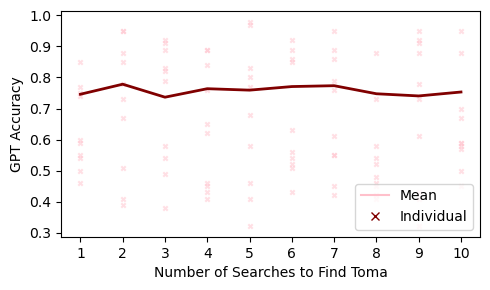

In [194]:
probs = np.array(probs).T
mean = np.mean(probs,axis=0)
plt.figure(figsize=(5,3))
for i in range(10):
    plt.scatter(np.arange(1,11,1),probs[i],alpha=0.5,color='pink',s=10,marker='x')
plt.plot(np.arange(1,11,1),mean,label='Mean',color='maroon',linewidth=2)
plt.xlabel('Number of Searches to Find Toma')
plt.ylabel('GPT Accuracy')
plt.xticks(np.arange(1,11,1))
# make a legend for the mean line and the scatter points
mean_line = plt.Line2D((0,1),(0,0), color='pink', linestyle='-')
scatter = plt.Line2D((0,1),(0,0), color='maroon', marker='x', linestyle='',alpha=1)
plt.legend([mean_line,scatter],['Mean','Individual'],loc='lower right')
# caption

plt.tight_layout()
plt.savefig('tom_data/toma_accuracy.png',dpi=600)
plt.show()

# Citations

<p style="padding-left: 2em; text-indent: -2em;">[1] Tomasello, Michael. "The human adaptation for culture." Annual review of anthropology 28, no. 1 (1999): 509-529.<br>
<p style="padding-left: 2em; text-indent: -2em;">[2]  Kosinski, Michal. "Theory of mind may have spontaneously emerged in large language models." arXiv preprint arXiv:2302.02083 (2023).<br>
<p style="padding-left: 2em; text-indent: -2em;">[3] Ullman, Tomer. "Large Language Models Fail on Trivial Alterations to Theory-of-Mind Tasks." arXiv preprint arXiv:2302.08399 (2023).<br>
<p style="padding-left: 2em; text-indent: -2em;">[4] Brown, Tom, Benjamin Mann, Nick Ryder, Melanie Subbiah, Jared D. Kaplan, Prafulla Dhariwal, Arvind Neelakantan et al. "Language models are few-shot learners." Advances in neural information processing systems 33 (2020): 1877-1901.
<p style="padding-left: 2em; text-indent: -2em;">[5] Qian, Jing, Hong Wang, Zekun Li, Shiyang Li, and Xifeng Yan. "Limitations of language models in arithmetic and symbolic induction." arXiv preprint arXiv:2208.05051 (2022).
